In [11]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [14]:
# Import citipy
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

631

In [15]:
#Import the dependencies
import requests
# Import API key
from config import weather_api_key

In [16]:
# Build basic URL with API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Import the datetime module from the datetime library
from datetime import datetime

In [18]:
#Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.    ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:  
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.    
-----------------------------
Processing Record 1 of Set 1 | howard springs
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | tessalit
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | walvis bay
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | kyren
Processing Record 9 of Set 1 | bitkine
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | cochrane
Processing Record 13 of Set 1 | ruteng
Processing Record 14 of Set 1 | limoux
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | pochutla
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | magistralnyy
Processing Record 21 of Set 1 | gat
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23

Processing Record 37 of Set 4 | longyearbyen
Processing Record 38 of Set 4 | angoche
Processing Record 39 of Set 4 | bluff
Processing Record 40 of Set 4 | luena
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | honolulu
Processing Record 44 of Set 4 | fukaya
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | bireun
Processing Record 49 of Set 4 | saint peters
Processing Record 50 of Set 4 | inuvik
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | canico
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | port hedland
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | klyuchi
Processing Record 8 of Set 5 | den helder
Processing Record 9 of Set 5 | mareeba
Processing Record 10 of 

Processing Record 28 of Set 8 | sangar
Processing Record 29 of Set 8 | barbar
City not found. Skipping...
Processing Record 30 of Set 8 | iberia
Processing Record 31 of Set 8 | ponta do sol
Processing Record 32 of Set 8 | villachuato
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | cam ranh
Processing Record 35 of Set 8 | donghai
Processing Record 36 of Set 8 | gobabis
Processing Record 37 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 38 of Set 8 | kyabe
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | salalah
Processing Record 41 of Set 8 | labutta
City not found. Skipping...
Processing Record 42 of Set 8 | middle island
Processing Record 43 of Set 8 | sidi qasim
City not found. Skipping...
Processing Record 44 of Set 8 | cangzhou
Processing Record 45 of Set 8 | askarovo
Processing Record 46 of Set 8 | laguna
Processing Record 47 of Set 8 | tura
Processing Record 48 of Set 8 | mys shmidta
City not found. Skip

Processing Record 16 of Set 12 | ghanzi
Processing Record 17 of Set 12 | parana
Processing Record 18 of Set 12 | san luis
Processing Record 19 of Set 12 | sambava
Processing Record 20 of Set 12 | caucaia
Processing Record 21 of Set 12 | richards bay
Processing Record 22 of Set 12 | price
Processing Record 23 of Set 12 | lakatoro
Processing Record 24 of Set 12 | touros
Processing Record 25 of Set 12 | mbuji-mayi
Processing Record 26 of Set 12 | flinders
Processing Record 27 of Set 12 | karpogory
Processing Record 28 of Set 12 | oxelosund
Processing Record 29 of Set 12 | krasnyy profintern
Processing Record 30 of Set 12 | bakchar
Processing Record 31 of Set 12 | arys
Processing Record 32 of Set 12 | eldorado
Processing Record 33 of Set 12 | tumaco
Processing Record 34 of Set 12 | dzilam gonzalez
Processing Record 35 of Set 12 | yulara
Processing Record 36 of Set 12 | chililabombwe
Processing Record 37 of Set 12 | vorobyevka
Processing Record 38 of Set 12 | yar-sale
Processing Record 39 o

In [19]:
len(city_data)

578

In [20]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Howard Springs,-12.4970,131.0470,86.88,73,5,6.06,AU,2021-07-25 01:32:23
1,Arraial Do Cabo,-22.9661,-42.0278,69.82,76,0,22.79,BR,2021-07-25 01:25:32
2,Tessalit,20.1986,1.0114,86.90,50,21,11.72,ML,2021-07-25 01:26:26
3,Punta Arenas,-53.1500,-70.9167,39.31,81,75,14.97,CL,2021-07-25 01:25:23
4,Rikitea,-23.1203,-134.9692,69.35,55,0,0.81,PF,2021-07-25 01:25:22
5,Walvis Bay,-22.9575,14.5053,68.09,7,0,18.41,NA,2021-07-25 01:31:20
6,Kyren,51.6828,102.1408,68.47,62,98,2.30,RU,2021-07-25 01:32:24
7,Bitkine,11.9801,18.2138,77.74,75,100,7.96,TD,2021-07-25 01:32:25
8,Lebu,-37.6167,-73.6500,51.48,82,93,22.41,CL,2021-07-25 01:25:25
9,Iqaluit,63.7506,-68.5145,44.33,87,75,8.05,CA,2021-07-25 01:28:06


In [21]:
# Reorder columns of DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Howard Springs,AU,2021-07-25 01:32:23,-12.4970,131.0470,86.88,73,5,6.06
1,Arraial Do Cabo,BR,2021-07-25 01:25:32,-22.9661,-42.0278,69.82,76,0,22.79
2,Tessalit,ML,2021-07-25 01:26:26,20.1986,1.0114,86.90,50,21,11.72
3,Punta Arenas,CL,2021-07-25 01:25:23,-53.1500,-70.9167,39.31,81,75,14.97
4,Rikitea,PF,2021-07-25 01:25:22,-23.1203,-134.9692,69.35,55,0,0.81
5,Walvis Bay,NA,2021-07-25 01:31:20,-22.9575,14.5053,68.09,7,0,18.41
6,Kyren,RU,2021-07-25 01:32:24,51.6828,102.1408,68.47,62,98,2.30
7,Bitkine,TD,2021-07-25 01:32:25,11.9801,18.2138,77.74,75,100,7.96
8,Lebu,CL,2021-07-25 01:25:25,-37.6167,-73.6500,51.48,82,93,22.41
9,Iqaluit,CA,2021-07-25 01:28:06,63.7506,-68.5145,44.33,87,75,8.05


In [22]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

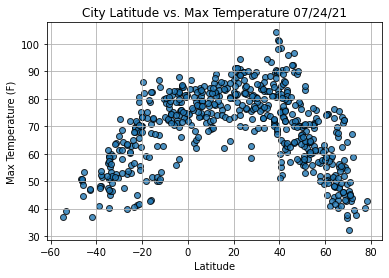

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

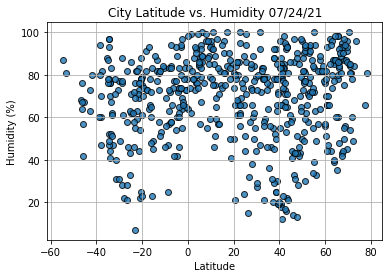

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

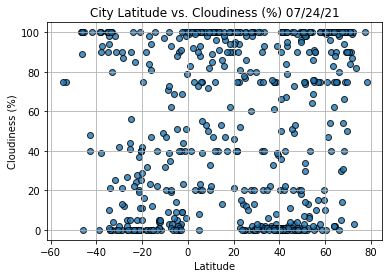

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

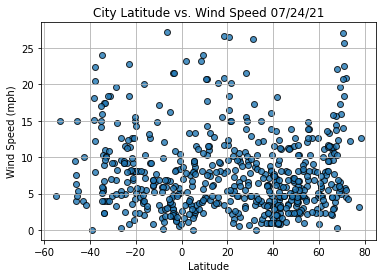

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_liner_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

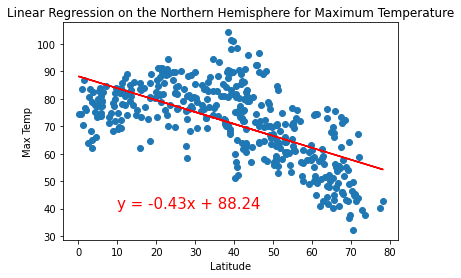

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

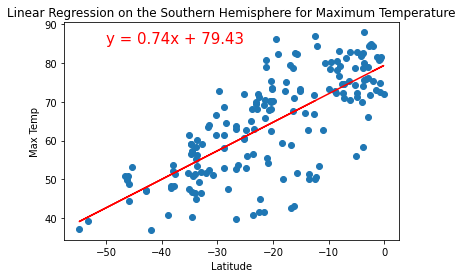

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,85))

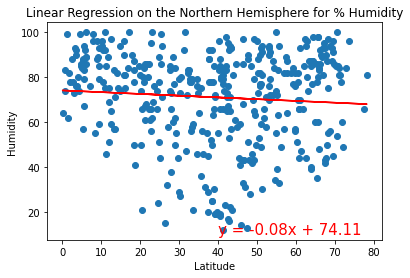

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity', 'Humidity', (40,10))

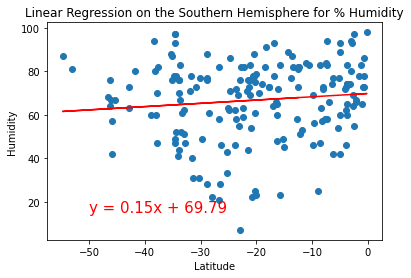

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity', 'Humidity', (-50,15))

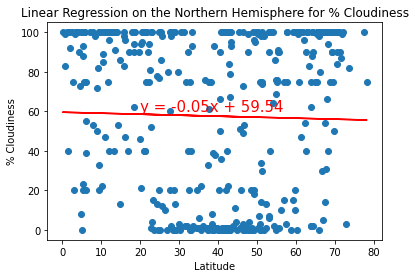

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (20,60))

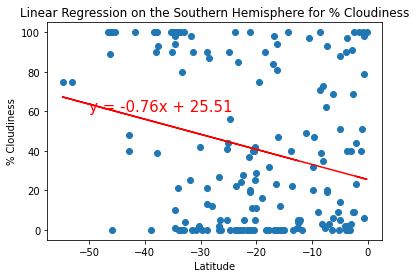

In [35]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

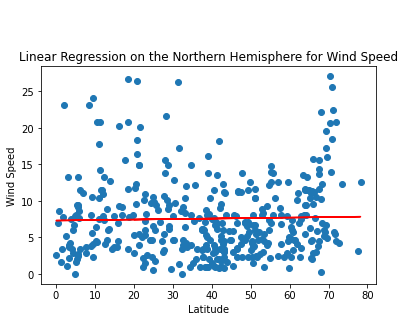

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (40,35))

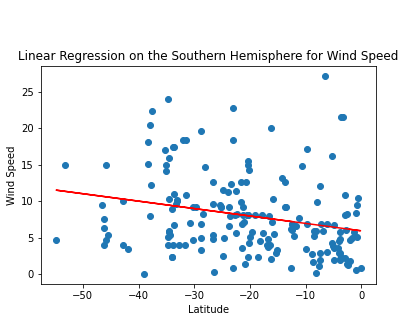

In [37]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-50,35))